In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd 
import pmdarima as pm
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [3]:
data = pd.read_csv('../ts_data/monthly-beer-production-in-austr.csv', 
                   parse_dates=['Month'], 
                   index_col=['Month'])

In [4]:
data

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


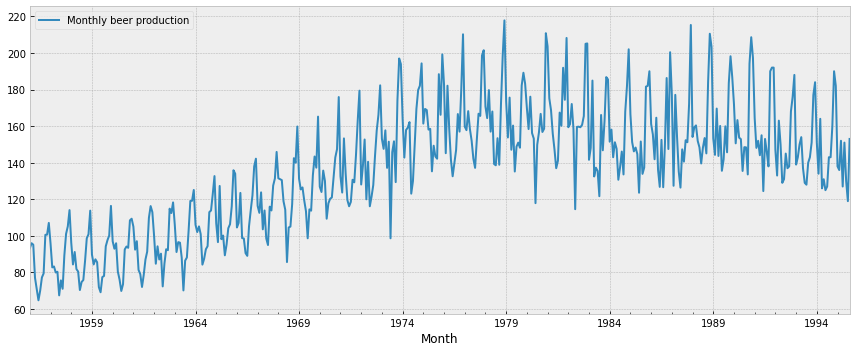

In [5]:
data.plot(figsize=(12,5))
plt.tight_layout()
plt.show()

## Auto-Correlation

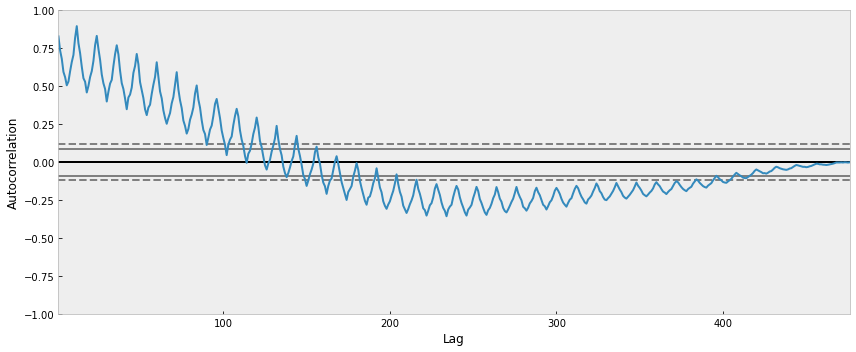

In [6]:
plt.figure(figsize=(12,5))
pm.utils.autocorr_plot(data.values.flatten(), show=False)
plt.tight_layout()
plt.show()

## Decomposition

In [7]:
decompose = pm.arima.decompose(x=data.values.flatten(), type_='additive', m=12)

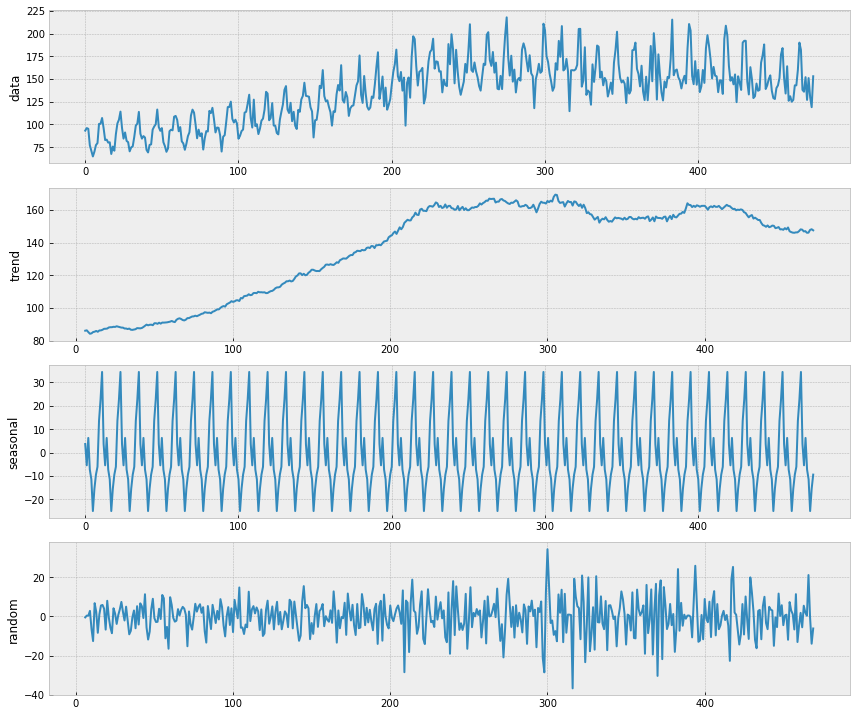

In [8]:
fig, ax = plt.subplots(4, 1, figsize=(12,10))

ax[0].plot(decompose[0])
ax[0].set_ylabel('data')

ax[1].plot(decompose[1])
ax[1].set_ylabel('trend')

ax[2].plot(decompose[2])
ax[2].set_ylabel('seasonal')

ax[3].plot(decompose[3])
ax[3].set_ylabel('random')

plt.tight_layout()
plt.show()

## ACF / PACF

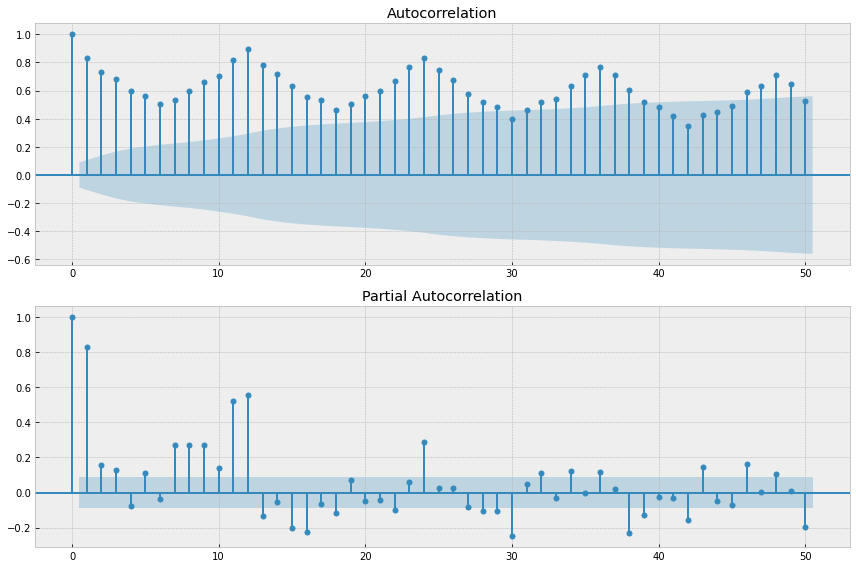

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
pm.utils.plot_acf(data.values.flatten(), alpha=0.05, lags=50, ax=ax[0], show=False)
pm.utils.plot_pacf(data.values.flatten(), alpha=0.05, lags=50, ax=ax[1], show=False)
plt.tight_layout()
plt.show()